Predicción de la clase de vino segun sus componentes

1. Carga de datos

In [1]:
#Preparación del entorno de trabajo con las librerias necesarias

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [2]:
# Definimos los nombres de las columnas
column_names = ["Clase", "Alcohol", "Ácido málico", "Ceniza", "Alcalinidad de la ceniza", 
                "Magnesio", "Fenoles totales", "Flavonoides", "Fenoles no flavonoides", 
                "Proantocianinas", "Intensidad del color", "Tono", 
                "OD280/OD315 de vinos diluidos", "Prolina"]

In [3]:
#Carga de la informacion del CSV en una variable llamada dataframe con encabezado personalizado
dataframe = pd.read_csv(r"D:\Descargas\archive(2)\wine.data", names=column_names, sep="," )

In [4]:
#Mostramos ahora nuestro dataframe con sus encabezados y cantidad de valores y columnas
dataframe

,Clase,Alcohol,Ácido málico,Ceniza,Alcalinidad de la ceniza,Magnesio,Fenoles totales,Flavonoides,Fenoles no flavonoides,Proantocianinas,Intensidad del color,Tono,OD280/OD315 de vinos diluidos,Prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
# Función para agregar texto adicional
def agregar_texto(valor):
    return "Clase"+ str (valor)

In [6]:
# Aplicamos la función a la columna "Clase"
dataframe['Clase'] = dataframe['Clase'].apply(agregar_texto)

In [7]:
#Mostramos nuevamente nuestro dataframe
dataframe

,Clase,Alcohol,Ácido málico,Ceniza,Alcalinidad de la ceniza,Magnesio,Fenoles totales,Flavonoides,Fenoles no flavonoides,Proantocianinas,Intensidad del color,Tono,OD280/OD315 de vinos diluidos,Prolina
0,Clase1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,Clase1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,Clase1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,Clase1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,Clase1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Clase3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,Clase3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,Clase3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,Clase3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
#Mostramos estadisticas 
dataframe.describe()

,Alcohol,Ácido málico,Ceniza,Alcalinidad de la ceniza,Magnesio,Fenoles totales,Flavonoides,Fenoles no flavonoides,Proantocianinas,Intensidad del color,Tono,OD280/OD315 de vinos diluidos,Prolina
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


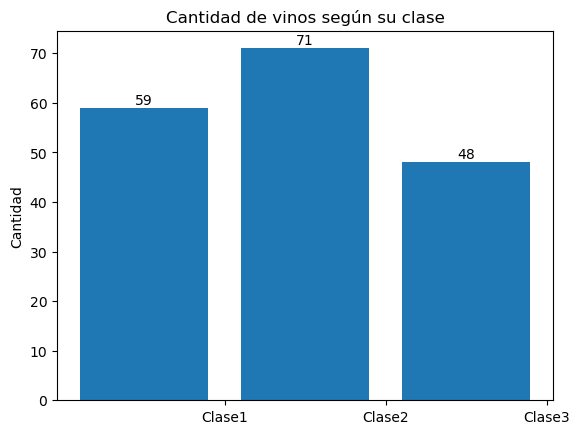

In [9]:
#Motramos grafica de los datos
plt.hist(dataframe.Clase, bins=range(0, len(dataframe['Clase'].unique()) + 1), rwidth=0.8)
plt.ylabel('Cantidad')
plt.title('Cantidad de vinos según su clase')

# Obtenemos las frecuencias de cada clase
clases, frecuencias = np.unique(dataframe.Clase, return_counts=True)

# Agregamos el valor de la cantidad centrado sobre cada barra
for i, frecuencia in enumerate(frecuencias):
    plt.text(i + 0.5, frecuencia + 3, str(frecuencia), ha='center', va='top')
    
# Etiquetas en el eje x
plt.xticks(range(1, len(dataframe['Clase'].unique())+ 1), [str(c) for c in clases])

plt.show()

2. Desarrollo

In [10]:
#Declaramos las columnas excluyendo la de Clase y la usamos para el eje Y
x = dataframe.drop(columns='Clase')
y = dataframe['Clase']

In [11]:
#Separamos los datos para entrenar y probar 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [12]:
#Creamos el arbol de decision
tree = DecisionTreeClassifier()

In [13]:
#Creacion del modelo
arbol = tree.fit(x_train,y_train)

[Text(0.5, 0.9285714285714286, 'x[12] <= 755.0\ngini = 0.659\nsamples = 142\nvalue = [47, 56, 39]'),
 Text(0.25, 0.7857142857142857, 'x[6] <= 1.235\ngini = 0.501\nsamples = 88\nvalue = [2, 52, 34]'),
 Text(0.125, 0.6428571428571429, 'x[9] <= 3.56\ngini = 0.161\nsamples = 34\nvalue = [0, 3, 31]'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.1875, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]'),
 Text(0.375, 0.6428571428571429, 'x[10] <= 0.63\ngini = 0.172\nsamples = 54\nvalue = [2, 49, 3]'),
 Text(0.3125, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4375, 0.5, 'x[12] <= 726.5\ngini = 0.075\nsamples = 51\nvalue = [2, 49, 0]'),
 Text(0.375, 0.35714285714285715, 'x[0] <= 13.175\ngini = 0.039\nsamples = 50\nvalue = [1, 49, 0]'),
 Text(0.3125, 0.21428571428571427, 'gini = 0.0\nsamples = 46\nvalue = [0, 46, 0]'),
 Text(0.4375, 0.21428571428571427, 'x[9] <= 4.08\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(0.375, 0.07142857142857142, 

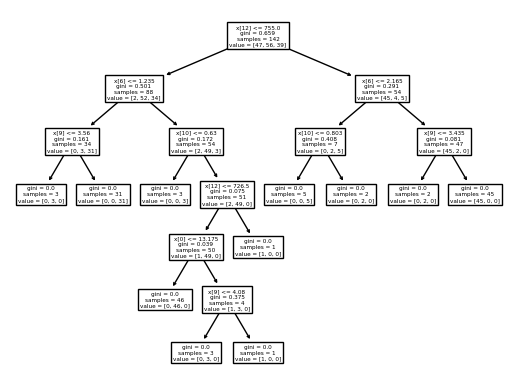

In [14]:
#Graficamos el arbol resultante
plot_tree(arbol)

In [15]:
#Hacemos predicciones y las mostramos
y_pred = arbol.predict(x_test)
y_pred

array(['Clase3', 'Clase1', 'Clase3', 'Clase2', 'Clase2', 'Clase2',
       'Clase3', 'Clase1', 'Clase2', 'Clase2', 'Clase1', 'Clase1',
       'Clase3', 'Clase2', 'Clase3', 'Clase1', 'Clase2', 'Clase1',
       'Clase1', 'Clase1', 'Clase2', 'Clase2', 'Clase1', 'Clase1',
       'Clase3', 'Clase2', 'Clase3', 'Clase2', 'Clase1', 'Clase3',
       'Clase2', 'Clase2', 'Clase1', 'Clase2', 'Clase1', 'Clase1'],
      dtype=object)

In [41]:
#Examinamos la matriz de confusion
pd.crosstab(np.array(y_test), y_pred, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,Clase1,Clase2,Clase3
Actual,,,
Clase1,12,0,0
Clase2,2,13,0
Clase3,0,1,8


In [17]:
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.9166666666666666

In [18]:
#Reporte del modelo
reporte = classification_report(y_test, y_pred)
print("Informe de clasificación:\n", reporte)

Informe de clasificación:
               precision    recall  f1-score   support

      Clase1       0.86      1.00      0.92        12
      Clase2       0.93      0.87      0.90        15
      Clase3       1.00      0.89      0.94         9

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36

